In [1]:
import sys,os,pandas,numpy,seaborn

import scipy,scipy.stats

import matplotlib,matplotlib.pyplot
matplotlib.rcParams.update({'font.size':40,'font.family':'Arial','xtick.labelsize':20,'ytick.labelsize':20,'axes.labelsize':33})
matplotlib.rcParams['pdf.fonttype']=42

# 0. user defined variables

In [2]:
transcripts_data_file='/Volumes/omics4tb2/alomana/projects/TLR/data/ecoli_GSE53767/counts/mRNA.txt'
footprints_data_file='/Volumes/omics4tb2/alomana/projects/TLR/data/ecoli_GSE53767/counts/footprints.txt'

# 1. read files

In [3]:
dfa=pandas.read_csv(transcripts_data_file,sep='\t',header=None)
dfa.set_index(0,inplace=True)
dfa.rename_axis('geneID',inplace=True)
dfa.columns=['mRNA']
print(dfa.shape)
dfa.head()

(4145, 1)


,mRNA
geneID,
transcript:AAC73112,870
transcript:AAC73113,5865
transcript:AAC73114,1799
transcript:AAC73115,2678
transcript:AAC73116,93


In [4]:
dfb=pandas.read_csv(footprints_data_file,sep='\t',header=None)
dfb.set_index(0,inplace=True)
dfb.rename_axis('geneID',inplace=True)
dfb.columns=['footprints']
print(dfb.shape)
dfb.head()

(4145, 1)


,footprints
geneID,
transcript:AAC73112,3961
transcript:AAC73113,18698
transcript:AAC73114,4175
transcript:AAC73115,12162
transcript:AAC73116,132


In [5]:
dfc=dfa.join(dfb,how='inner')
print(dfc.shape)
dfc.head()

(4145, 2)


,mRNA,footprints
geneID,,
transcript:AAC73112,870,3961
transcript:AAC73113,5865,18698
transcript:AAC73114,1799,4175
transcript:AAC73115,2678,12162
transcript:AAC73116,93,132


# 2. manipulate data

In [6]:
dfc['log2M']=numpy.log2(dfc['mRNA'])
dfc['log2F']=numpy.log2(dfc['footprints'])
dfc['TE']=dfc['log2F']-dfc['log2M']
dfc.head()

/Users/alomana/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


,mRNA,footprints,log2M,log2F,TE
geneID,,,,,
transcript:AAC73112,870,3961,9.764872,11.951649,2.186777
transcript:AAC73113,5865,18698,12.517915,14.190596,1.672681
transcript:AAC73114,1799,4175,10.812979,12.027560,1.214581
transcript:AAC73115,2678,12162,11.386940,13.570093,2.183153
transcript:AAC73116,93,132,6.539159,7.044394,0.505235


In [7]:
gene_names=dfc.index.to_list()
print('number of elements:',len(gene_names))

setx=[]; sety=[]
hollowx=[]; hollowy=[]

for gene_name in gene_names:
    
    if dfc.loc[gene_name,'mRNA'] > 10: # exclude genes below 10 counts
        if dfc.loc[gene_name,'footprints'] == 0: # exclude hollow genes
            hollowx.append(dfc.loc[gene_name,'log2M']); hollowy.append(dfc.loc[gene_name,'TE'])
        else:
            setx.append(dfc.loc[gene_name,'log2M']); sety.append(dfc.loc[gene_name,'TE'])
            
print(len(setx),len(hollowx))

number of elements: 4145
3351 3


## 2.1. linear regression

In [8]:
print('number of elements:',len(setx),len(sety))
# perform regression analysis
print('\t regression results:')
slope,intercept,r_value,p_value,std_err=scipy.stats.linregress(setx,sety)
print('\t\t slope',slope)
print('\t\t intercept',intercept)
print('\t\t r_value',r_value)
print('\t\t pvalue',p_value)
print('\t\t std_err',std_err)

# compute for the model
m=slope
c=intercept
expected=list(m*numpy.array(setx)+c)

number of elements: 3351 3351
	 regression results:
		 slope 0.0915266601179342
		 intercept 0.420316888845537
		 r_value 0.192126389396209
		 pvalue 3.1681047782445686e-29
		 std_err 0.0080785958449254


# 3. plot

## 3.1. plot regression

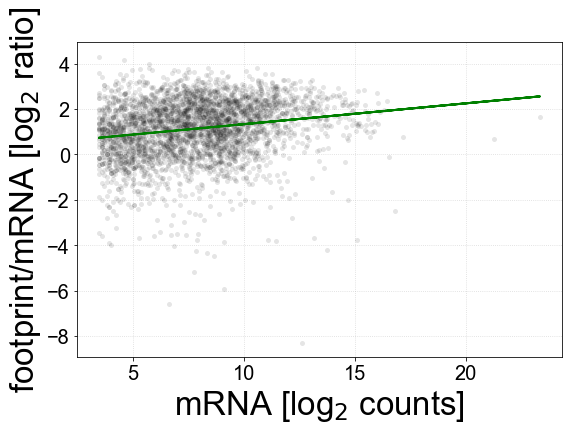

In [9]:
matplotlib.pyplot.figure(None,(8,6))
matplotlib.pyplot.plot(setx,sety,'o',color='black',alpha=0.1,ms=5,mew=0)
matplotlib.pyplot.plot(hollowx,hollowy,'o',alpha=0.1,mew=0,color='tan')

matplotlib.pyplot.xlabel('mRNA [log$_{2}$ counts]')
matplotlib.pyplot.ylabel('footprint/mRNA [log$_{2}$ ratio]')
matplotlib.pyplot.plot(setx,expected,'-',lw=2,color='green')

matplotlib.pyplot.grid(True,alpha=0.5,ls=':')
matplotlib.pyplot.tight_layout()

## 3.2. plot blocks

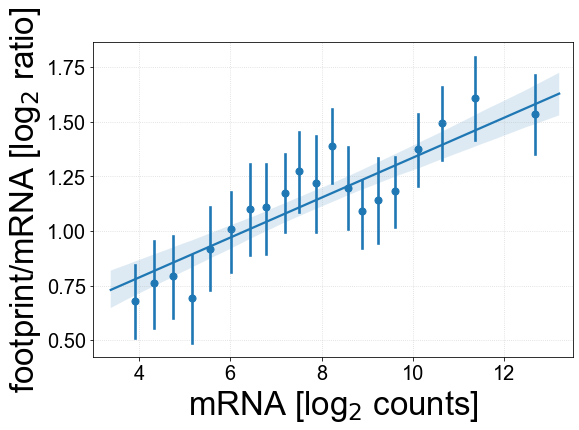

In [10]:
matplotlib.pyplot.figure(None,(8,6))

seaborn.regplot(x=setx,y=sety,x_bins=20)

matplotlib.pyplot.xlim([3,13.5])
matplotlib.pyplot.xlabel('mRNA [log$_{2}$ counts]')
matplotlib.pyplot.ylabel('footprint/mRNA [log$_{2}$ ratio]')

matplotlib.pyplot.grid(True,alpha=0.5,ls=':')
matplotlib.pyplot.tight_layout()

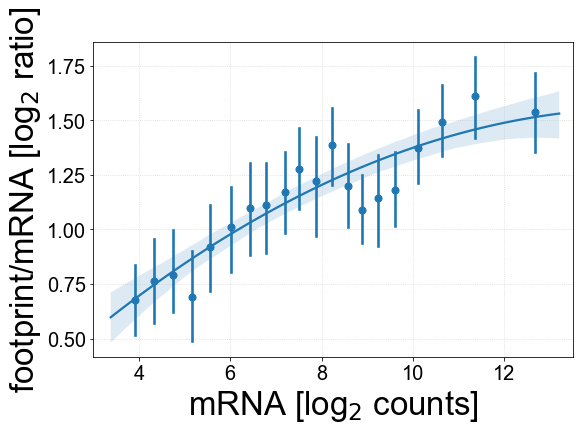

In [11]:
matplotlib.pyplot.figure(None,(8,6))

seaborn.regplot(x=setx,y=sety,x_bins=20,order=2)

matplotlib.pyplot.xlim([3,13.5])
matplotlib.pyplot.xlabel('mRNA [log$_{2}$ counts]')
matplotlib.pyplot.ylabel('footprint/mRNA [log$_{2}$ ratio]')

matplotlib.pyplot.grid(True,alpha=0.5,ls=':')
matplotlib.pyplot.tight_layout()

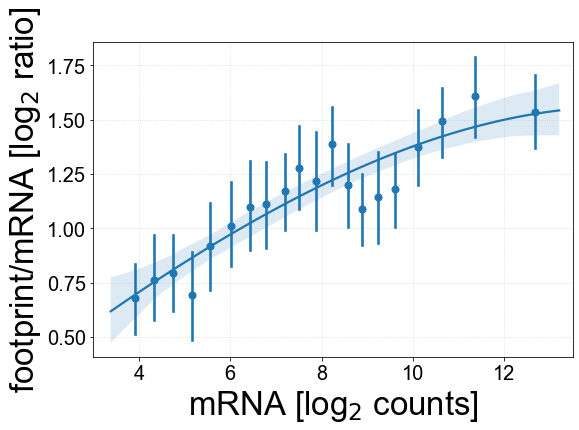

In [12]:
matplotlib.pyplot.figure(None,(8,6))

seaborn.regplot(x=setx,y=sety,x_bins=20,order=3)

matplotlib.pyplot.xlim([3,13.5])
matplotlib.pyplot.xlabel('mRNA [log$_{2}$ counts]')
matplotlib.pyplot.ylabel('footprint/mRNA [log$_{2}$ ratio]')

matplotlib.pyplot.grid(True,alpha=0.5,ls=':')
matplotlib.pyplot.tight_layout()